In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [69]:
cd '/content/gdrive/My Drive/Brain_mri_clg' 

/content/gdrive/My Drive/Brain_mri_clg


In [0]:
from IPython.display import clear_output
!pip install imutils
clear_output()


In [0]:
import numpy as np
import pandas as pd


In [0]:
import os
import shutil

In [0]:
from tqdm import tqdm
import cv2

In [0]:
!python '/content/gdrive/My Drive/Brain_mri_clg/load_data.py'

In [99]:
TRAIN_DIR = 'TRAIN/'
TEST_DIR = 'TEST/'
VAL_DIR = 'VAL/'
IMG_SIZE = (224,224)

X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)
X_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)
X_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)

 50%|█████     | 1/2 [00:00<00:00,  9.60it/s]

132 images loaded from TRAIN/ directory.
10 images loaded from TEST/ directory.


100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

35 images loaded from VAL/ directory.


In [0]:
import imutils

In [0]:
import matplotlib.pyplot as plt


##Crop_Image

In [0]:
# !python '/content/gdrive/My Drive/Brain_mri_clg/crop_img.py'

In [0]:
# # apply this for each set
# X_train_crop = crop_imgs(set_name=X_train)
# X_val_crop = crop_imgs(set_name=X_val)
# X_test_crop = crop_imgs(set_name=X_test)

##Plot_Image

In [0]:
!python '/content/gdrive/My Drive/Brain_mri_clg/plot.py'

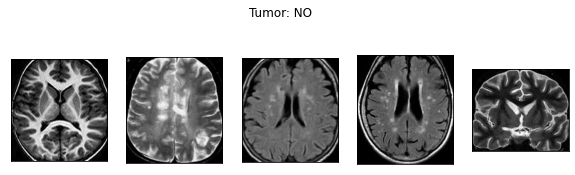

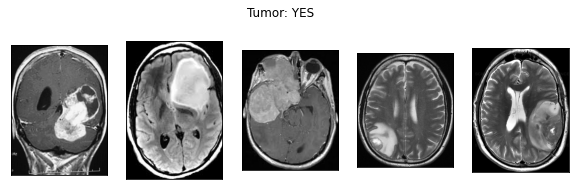

In [105]:
plot_samples(X_train_crop, y_train, labels, 5)

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [0]:
def preprocess_imgs(set_name, img_size):
    
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [0]:
X_train_prep = preprocess_imgs(set_name=X_train_crop, img_size=IMG_SIZE)
X_test_prep = preprocess_imgs(set_name=X_test_crop, img_size=IMG_SIZE)
X_val_prep = preprocess_imgs(set_name=X_val_crop, img_size=IMG_SIZE)

##Model

In [0]:
from keras.preprocessing.image import ImageDataGenerator
RANDOM_SEED=41

###Data Augmentation

In [110]:
!python '/content/gdrive/My Drive/Brain_mri_clg/data_augment.py'

Using TensorFlow backend.
2020-05-17 16:44:57.343548: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Found 132 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


In [0]:
# !kaggle datasets download -d 'gaborfodor/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [0]:
# !mkdir weights_model

In [0]:
# !unzip  '/content/gdrive/My Drive/Brain_mri_clg/keras-pretrained-models.zip'

In [0]:
# cd  ..

In [115]:
!python '/content/gdrive/My Drive/Brain_mri_clg/model.py'

Using TensorFlow backend.
2020-05-17 16:45:01.411664: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-17 16:45:03.132395: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-17 16:45:03.134228: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-05-17 16:45:03.134269: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9391b7b0dcf3): /proc/driver/nvidia/version does not exist
2020-05-17 16:45:03.139852: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300000000 Hz
2020-05-17 16:45:03.140068: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1a1cbc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-05-17 16:45:0

In [0]:
# from keras.callbacks import EarlyStopping

In [0]:
# EPOCHS = 30
# es = EarlyStopping(
#     monitor='val_accuracy', 
#     mode='max',
#     patience=10
# )

In [0]:
# history = model.fit_generator(    
#     train_generator,
#     steps_per_epoch=50,
#     epochs=EPOCHS,
#     validation_data=validation_generator,
#     validation_steps=25,
#     callbacks=[es]
# )

In [0]:
import pickle

In [0]:
# import pickle

# Pkl_Filename = "Pickle_RL_Model.pkl"  

# with open(Pkl_Filename, 'wb') as file:  
#     pickle.dump(model, file)

In [121]:
h='/content/gdrive/My Drive/Brain_mri_clg/Pickle_RL_Model.pkl'
with open(h, 'rb') as file:  
    load_model = pickle.load(file)

load_model

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [0]:
import itertools

In [124]:
# validate on val set
predictions = load_model.predict(X_val_prep)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_val, predictions)
print('Val Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_val, predictions) 

Val Accuracy = 0.97


In [125]:
confusion_mtx

array([[18,  0],
       [ 1, 16]])